### Import packages

In [54]:
import numpy as np
import sklearn
import tensorflow as tf
import pandas as pd

###  Specify data paths

In [55]:
TRAINING_DATA_PATH = "./data/train.csv"
TESTING_DATA_PATH = "./data/test.csv"

### Read csv

In [56]:
train_df = pd.read_csv(TRAINING_DATA_PATH)
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [57]:
test_df = pd.read_csv(TESTING_DATA_PATH)
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


### Cancatenate train data and test data
- Data came with train and test already prepared.
- Since we don't know the method used in prepering the model and whether it will favor our model, we add them

In [58]:
#COncatnate both dataframe and shuffle
df = pd.concat([train_df,train_df])
df.tail(5)

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


### Shuffle result dataframe
- We then shuffle them to mix training and testing data

In [59]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()

,id,title,author,text,label
2920,2920,"Obama, Clinton and Putin Play on the Same Team...",Dave Hodges,\n\nObama and Putin are playing on the same te...,1
5933,5933,"Raccoons in Central Park Draw Crowds, and Warn...",Sarah Maslin Nir,"Like a little crew of bandits, the first few...",0
7946,7946,Dollar Collapse & WORLD WAR 3 Coming Before Th...,Pakalert,source Add To The Conversation Using Facebook ...,1
16382,16382,TOP SECRET: THESE ARE ACTUALLY SOCIALIST COUNT...,Rowan Wolf,[World socialist flag by Frankoko.] Andre Vltc...,1
11019,11019,Feinstein on Trump: ’I Think He’s Going to Get...,Jeff Poor,Part 4 of QA. A protester asked ”how do we get...,0


### Drop unneccessary colmun from the data frame
- In this case we dont need the id and author column

In [60]:
#Take away id
df = df.drop('id',axis = 1).drop('author',axis = 1)
# df.shape
# df.label.values
df.head()

,title,text,label
2920,"Obama, Clinton and Putin Play on the Same Team...",\n\nObama and Putin are playing on the same te...,1
5933,"Raccoons in Central Park Draw Crowds, and Warn...","Like a little crew of bandits, the first few...",0
7946,Dollar Collapse & WORLD WAR 3 Coming Before Th...,source Add To The Conversation Using Facebook ...,1
16382,TOP SECRET: THESE ARE ACTUALLY SOCIALIST COUNT...,[World socialist flag by Frankoko.] Andre Vltc...,1
11019,Feinstein on Trump: ’I Think He’s Going to Get...,Part 4 of QA. A protester asked ”how do we get...,0


### GET REAL AND FAKE LABELS
- The label in the data came as 1 or 0 where 1 is real and 0 is fake
- We convert is back to the original form

In [61]:
label_list = list()
for label in df.label.values:
    if label == 1:
        label_list.append("REAL")
    else:
        label_list.append("FAKE")
label_list[:7]

['REAL', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL']

### Push new list back into the dataframe

In [62]:
df.label = np.array(label_list)

### Fix numpy data type issues

In [63]:
df.title=df.title.astype(str)
df.text=df.text.astype(str)
df.head(5)

,title,text,label
2920,"Obama, Clinton and Putin Play on the Same Team...",\n\nObama and Putin are playing on the same te...,REAL
5933,"Raccoons in Central Park Draw Crowds, and Warn...","Like a little crew of bandits, the first few...",FAKE
7946,Dollar Collapse & WORLD WAR 3 Coming Before Th...,source Add To The Conversation Using Facebook ...,REAL
16382,TOP SECRET: THESE ARE ACTUALLY SOCIALIST COUNT...,[World socialist flag by Frankoko.] Andre Vltc...,REAL
11019,Feinstein on Trump: ’I Think He’s Going to Get...,Part 4 of QA. A protester asked ”how do we get...,FAKE


### Fix numpy data type isses

In [64]:
label = df['label'].values.astype(str)
print(label.shape)

(41600,)


- The rest are our x values for training
- Let us extract them by droping the label column

In [65]:
from sklearn import preprocessing
def label_encode_binary(labels):
    binirizer = preprocessing.MultiLabelBinarizer()
    return (binirizer.fit_transform(labels),binirizer.classes_)

In [66]:
word = [word.split(',') for word in label]
encoded_label,classes = label_encode_binary(word)
encoded_label.shape

(41600, 2)

In [67]:
print(encoded_label[0])

[0 1]


- Machine learning models prefere to be trained on numbers than strings.
- To make it our news understandable, we will use the "bag of words" concept, where we extract about 400 common features from the data set.
- We use the keras tokinizer to transform the words to it binary matrices.

In [68]:
class TextProcessor(object):
    def __init__(self,vocab_size):
        self._vocab_size = vocab_size
        self._tokenizer = None
    def create_tokenizer(self,text_list):
        tokenizer =  tf.keras.preprocessing.text.Tokenizer(num_words = self._vocab_size)
        tokenizer.fit_on_texts(text_list)
        self._tokenizer = tokenizer
        
    def transform_text(self,text_list):
        tokinizer_matrix = self._tokenizer.texts_to_matrix(text_list)
        return tokinizer_matrix

- It is neccessary to use a class so that u can save the object of it. Will be neccessay during model deployment

- Now we create on object of our class and tranform text

In [69]:
pocessor = TextProcessor(200)

In [73]:
data = df.drop('label',axis = 1) 
data.head()

,title,text
2920,"Obama, Clinton and Putin Play on the Same Team...",\n\nObama and Putin are playing on the same te...
5933,"Raccoons in Central Park Draw Crowds, and Warn...","Like a little crew of bandits, the first few..."
7946,Dollar Collapse & WORLD WAR 3 Coming Before Th...,source Add To The Conversation Using Facebook ...
16382,TOP SECRET: THESE ARE ACTUALLY SOCIALIST COUNT...,[World socialist flag by Frankoko.] Andre Vltc...
11019,Feinstein on Trump: ’I Think He’s Going to Get...,Part 4 of QA. A protester asked ”how do we get...


- We will combile all the words in the different columns together so that we can encode them together

In [74]:
all_sentences = list()
for column in data.values:
    for news in column:
        all_sentences.append(news)
len(data['title'].values)

41600

- Now we go ahead and tranform our data into encoded bag of words
- We will initialize the tokinizer with all the sentences we just created so that it will index all the words.
- After that we will encode each feature seprately

In [75]:
pocessor.create_tokenizer(all_sentences)
title = pocessor.transform_text(data.title.values)
text = pocessor.transform_text(data.text.values)

In [77]:
data_words = np.concatenate((title,text),axis = 1)

In [78]:
# data2 = np.array(data2)  
data_words.shape

(41600, 400)

In [79]:
import pickle
with open('./processor_state.pkl','wb') as f:
    pickle.dump(pocessor,f)

In [80]:
train_size = int(len(df)*.8)
train_labels = encoded_label[:train_size]
test_labels = encoded_label[train_size:]
data_train = data_words[:train_size]
data_test = data_words[train_size:]

In [81]:
train_labels.shape

(33280, 2)

In [82]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()
model.add(Dense(128,input_shape = (400,) ,activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               51328     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 59,714
Trainable params: 59,714
Non-trainable params: 0
_________________________________________________________________


In [83]:
history = model.fit(data_train, train_labels,
epochs=5,
batch_size=128,
validation_split=0.3)

Epoch 1/5
182/182 [==============================] - 1s 5ms/step - loss: 0.3652 - accuracy: 0.8366 - val_loss: 0.1444 - val_accuracy: 0.9455
Epoch 2/5
182/182 [==============================] - 1s 3ms/step - loss: 0.1305 - accuracy: 0.9479 - val_loss: 0.1339 - val_accuracy: 0.9456
Epoch 3/5
182/182 [==============================] - 1s 3ms/step - loss: 0.1058 - accuracy: 0.9596 - val_loss: 0.1121 - val_accuracy: 0.9569
Epoch 4/5
182/182 [==============================] - 1s 3ms/step - loss: 0.0833 - accuracy: 0.9688 - val_loss: 0.1091 - val_accuracy: 0.9617
Epoch 5/5
182/182 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9819 - val_loss: 0.0971 - val_accuracy: 0.9633


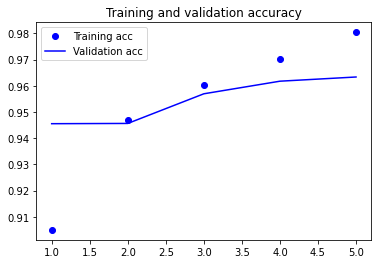

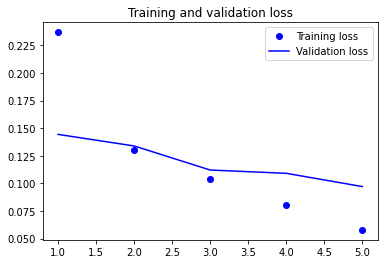

In [84]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [87]:
model.evaluate(data_test,test_labels,batch_size=128)

65/65 [==============================] - 0s 2ms/step - loss: 0.0988 - accuracy: 0.9631


[0.09880781918764114, 0.9631009697914124]

In [88]:
import os
import tempfile

MODEL_DIR = './model'
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

export_path = ./model/1



In [89]:
tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

INFO:tensorflow:Assets written to: ./model/1/assets


In [90]:
predictions = model.predict(data_test[2:3])

In [91]:
print(np.argmax(predictions))

0


In [92]:
class DecodePrediction(object):
    def __init__(self,label_class):
        self._label_class = label_class
    
    def decode_prediction(self,prediction):
        decoded = []
        for predicted in prediction:
            gratest_index = np.argmax(predicted)
            decoded.append(self._label_class[gratest_index]) 
        return decoded

In [93]:
decode_prediction = DecodePrediction(classes)

In [94]:
decode_prediction.decode_prediction(predictions)

['FAKE']

In [95]:
import shap

explainer = shap.DeepExplainer(model,data_train[:200])
sharp_vals = explainer.shap_values(data_test[:25])

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [96]:
words  = pocessor._tokenizer.word_index

word_lookup = [i for i in words.keys() ]
word_lookup = [""] + word_lookup


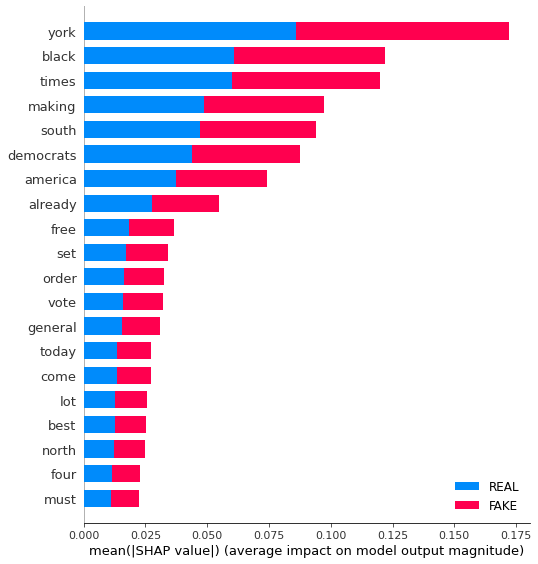

In [97]:
shap.summary_plot(sharp_vals,feature_names = word_lookup,class_names =classes)